In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [350]:
# read in the csv as a dataframe
file_guy = 'swipes.csv'
df = pd.read_csv(file_guy, header=1, skiprows=[2])
df.head(5)

,Swipe time
0,2017-03-01 06:00:06
1,2017-03-01 06:00:10
2,2017-03-01 06:00:13
3,2017-03-01 06:00:14
4,2017-03-01 06:00:15


In [351]:
# convert the values in our dataframe to datetime objects
df['Swipe time'] = pd.to_datetime(df['Swipe time'])
df.head(5)

,Swipe time
0,2017-03-01 06:00:06
1,2017-03-01 06:00:10
2,2017-03-01 06:00:13
3,2017-03-01 06:00:14
4,2017-03-01 06:00:15


In [352]:
# check we have datetime objects
df['Swipe time'].dtypes

dtype('<M8[ns]')

In [353]:
# make a column that gives day of month
df['day'] = pd.DatetimeIndex(df['Swipe time']).day

In [354]:
# remove #sprangbreak! from data set
sprang_break = np.arange(17,27)
df = df[~df['day'].isin(sprang_break)]

In [355]:
# make column for hour
df['hour'] = pd.DatetimeIndex(df['Swipe time']).hour

In [356]:
# make column for minute
df['minute'] = pd.DatetimeIndex(df['Swipe time']).minute

In [357]:
# make column for each quarter hour
df['quarter hour'] = (4*df['hour']+df['minute']/15).astype(int)

In [358]:
# filter out weekends and friday so we have uniform data
df = df[pd.DatetimeIndex(df['Swipe time']).dayofweek < 4] 

In [359]:
# when doing operations on columns, pandas matches by index
# reset the index so we can find the difference between rows in later operation
df = df.reset_index(drop=True)

In [360]:
# check to make sure weekends were removed
days = np.unique(df['day'].values)
days

array([ 1,  2,  6,  7,  8,  9, 13, 14, 15, 16, 27, 28, 29, 30], dtype=int32)

In [361]:
total_days = days.size
total_days

14

In [362]:
# find the interarrival time for people coming to the arc
df1 = df.iloc[1:,:]
df1 = df1.reset_index()
df['Interarrival'] = df1['Swipe time'] - df['Swipe time']

In [363]:
df.head(10)

,Swipe time,day,hour,minute,quarter hour,Interarrival
0,2017-03-01 06:00:06,1,6,0,24,00:00:04
1,2017-03-01 06:00:10,1,6,0,24,00:00:03
2,2017-03-01 06:00:13,1,6,0,24,00:00:01
3,2017-03-01 06:00:14,1,6,0,24,00:00:01
4,2017-03-01 06:00:15,1,6,0,24,00:00:02
5,2017-03-01 06:00:17,1,6,0,24,00:00:01
6,2017-03-01 06:00:18,1,6,0,24,00:00:02
7,2017-03-01 06:00:20,1,6,0,24,00:00:03
8,2017-03-01 06:00:23,1,6,0,24,00:00:03
9,2017-03-01 06:00:26,1,6,0,24,00:00:03


In [364]:
# make madeline a csv so she can find average initial starting conditions
df2 = df[df['quarter hour'] == 24]
df2 = df2[df2['Interarrival'] <= dt.timedelta(0,15)]
df2['Interarrival'] = pd.DatetimeIndex(df2['Interarrival']).second
df2.to_csv('madeline_smells.csv')
print(df2)

               Swipe time  day  hour  minute  quarter hour  Interarrival
0     2017-03-01 06:00:06    1     6       0            24             4
1     2017-03-01 06:00:10    1     6       0            24             3
2     2017-03-01 06:00:13    1     6       0            24             1
3     2017-03-01 06:00:14    1     6       0            24             1
4     2017-03-01 06:00:15    1     6       0            24             2
5     2017-03-01 06:00:17    1     6       0            24             1
6     2017-03-01 06:00:18    1     6       0            24             2
7     2017-03-01 06:00:20    1     6       0            24             3
8     2017-03-01 06:00:23    1     6       0            24             3
9     2017-03-01 06:00:26    1     6       0            24             3
10    2017-03-01 06:00:29    1     6       0            24             2
11    2017-03-01 06:00:31    1     6       0            24             0
12    2017-03-01 06:00:31    1     6       0       

In [365]:
# count average number of arrivals per quarter hour on weekdays
start = 24
f = np.bincount(df['quarter hour'].values)[start:]/total_days
f

array([60, 26, 19, 16, 17, 17, 17, 20, 20, 20, 18, 22, 23, 19, 19, 17, 21,
       22, 25, 30, 39, 33, 36, 43, 40, 36, 35, 29, 38, 29, 27, 34, 38, 34,
       37, 37, 48, 51, 57, 60, 60, 51, 47, 62, 84, 80, 70, 71, 74, 66, 78,
       80, 78, 63, 71, 75, 74, 68, 65, 67, 79, 64, 59, 52, 56, 40, 40, 26,
       23, 11,  3,  0])

In [366]:
# create bins for counting when people come during the day
bin_starts = np.arange(start, f.size+start)
first_bin = bin_starts[0]
bin_starts

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93, 94, 95])

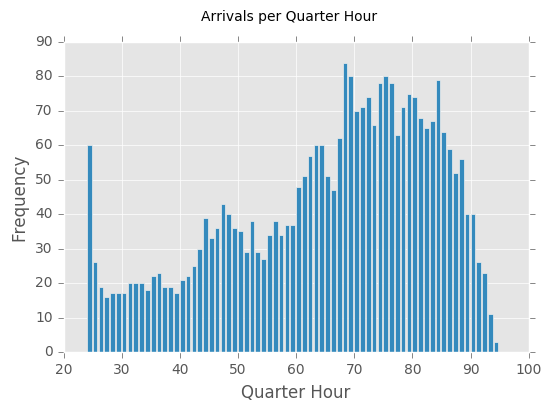

In [367]:
# graph how many people come to the arc/15 minute intervals
# try to find rouhgly homogeneous interarrival rates in the data
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(bin_starts, f)
ax.set_xlabel('Quarter Hour')
ax.set_ylabel('Frequency')
fig.suptitle('Arrivals per Quarter Hour')

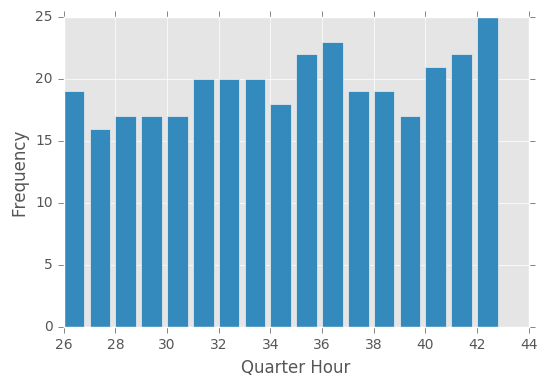

In [368]:
# interarrival rate 1
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(bin_starts[2:19], f[2:19])
ax.set_xlabel('Quarter Hour')
ax.set_ylabel('Frequency')

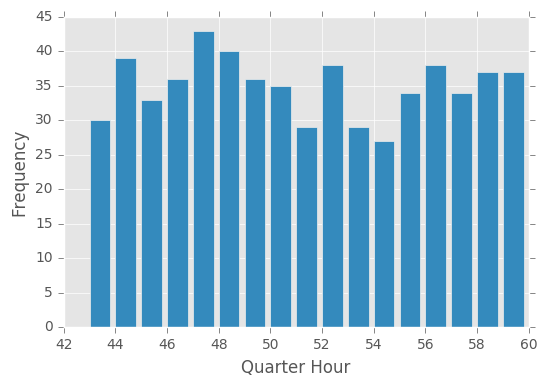

In [369]:
# interarrival rate 2
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(bin_starts[19:36], f[19:36])
ax.set_xlabel('Quarter Hour')
ax.set_ylabel('Frequency')

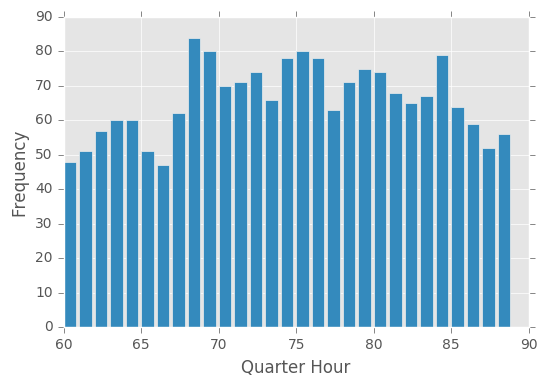

In [370]:
# interarrival rate 3
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(bin_starts[36:-7], f[36:-7])
ax.set_xlabel('Quarter Hour')
ax.set_ylabel('Frequency')

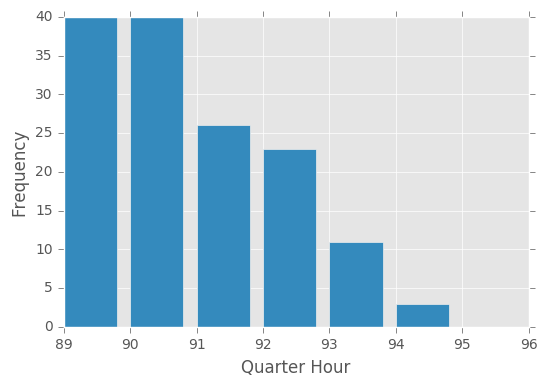

In [371]:
# interarrival rate 4 (to be excluded)
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(bin_starts[-7:], f[-7:])
ax.set_xlabel('Quarter Hour')
ax.set_ylabel('Frequency')

In [372]:
# list the quarter hours after 6am that mark our different arrival rates
starts = [2, 18, 35, 64]
for start in starts:
    idx = starts.index(start)
    
    if idx < len(starts) - 1:
        next_start = starts[idx+1]
        
        # grab all the data that fall between the lower and upper bound
        # of quarter hours for our current arrival rate
        temp_df = df[df['quarter hour'] >= start + first_bin]
        temp_df = temp_df[temp_df['quarter hour'] < next_start + first_bin]
        temp_df['Interarrival'] = temp_df['Interarrival'].dt.total_seconds()
        
        # find our average interarrival period
        mean = temp_df['Interarrival'].sum()/temp_df['Interarrival'].size

        k = 5.
        n = temp_df['Interarrival'].size
        
        # divide the pdf of our exponential function into k even sized bins
        bins = -mean*np.log(1-np.arange(k+1)/k)
        
        print('range: [%s, %s]' % (start, next_start))
        print('mean: %s' % mean)
        print('bins: %s' % bins)

        # determine which bin each interarrival time falls into
        binplace = np.digitize(temp_df['Interarrival'], bins)

        # determine the total number of interarrival times falling into each bin
        f = np.bincount(binplace)[1:]

        print('frequency: %s' % f)
        print('expected frequency: %s' % (n/k))
        
        # compute our X-squared statistic
        print('X-squared: %s' % ((f-n/k)**2/float(n/k)).sum())
        print()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log


range: [2, 18]
mean: 43.5482118606
bins: [ -0.           9.71750265  22.24554249  39.90282292  70.08814319
          inf]
frequency: [1204  807  755  743  909]
expected frequency: 883.6
X-squared: 164.639203259
()
range: [18, 35]
mean: 25.8034918724
bins: [ -0.           5.75788281  13.18108483  23.64350045  41.52911809
          inf]
frequency: [2299 1672 1304 1353 1677]
expected frequency: 1661.0
X-squared: 379.129440096
()
range: [35, 64]
mean: 13.6871085106
bins: [ -0.           3.05419      6.99172574  12.54137067  22.02855135
          inf]
frequency: [6118 6623 4939 4026 4955]
expected frequency: 5332.2
X-squared: 803.925359139
()


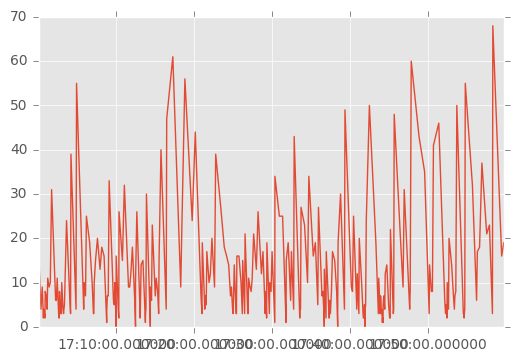

In [396]:
df_ex = df[df['day'] == 14]
df_ex = df_ex[df_ex['quarter hour'] >= 44 + first_bin]
df_ex = df_ex[df_ex['quarter hour'] < 48 + first_bin]

plt.style.use('ggplot')
fig, ax = plt.subplots()

times = df_ex['Swipe time'].values
interarrivals  = df_ex['Interarrival'].dt.total_seconds().values
ax.plot(times, interarrivals)